In [1]:
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import fiona #This library helps to read the large geojson file by reading it in chunks
import osmnx as ox
import pandas as pd
import numpy as np

1. Find out centroids

In [2]:
# Collect geometries and properties in lists
geometries = []
properties_list = []

with fiona.open('district_and_planning_area.geojson', 'r') as source:
    for feature in source:
        geometries.append(shape(feature['geometry']))
        properties_list.append(feature['properties'])

gdf_districts = gpd.GeoDataFrame(properties_list, geometry=geometries)

In [3]:
gdf_districts

,district,planning_area,geometry
0,East,Bedok,"MULTIPOLYGON (((103.93208 1.30555, 103.93208 1..."
1,Central,Bukit Timah,"MULTIPOLYGON (((103.79766 1.34813, 103.79806 1..."
2,West,Bukit Batok,"MULTIPOLYGON (((103.76408 1.37001, 103.76444 1..."
3,Central,Bukit Merah,"MULTIPOLYGON (((103.82362 1.26018, 103.82362 1..."
4,North,Central Water Catchment,"MULTIPOLYGON (((103.80702 1.41126, 103.80754 1..."
5,Central,Downtown Core,"MULTIPOLYGON (((103.86655 1.30386, 103.86696 1..."
6,East,Changi,"MULTIPOLYGON (((103.98236 1.39356, 103.98242 1..."
7,East,Changi Bay,"MULTIPOLYGON (((104.03143 1.35741, 104.03154 1..."
8,North,Lim Chu Kang,"MULTIPOLYGON (((103.72246 1.45116, 103.72426 1..."
9,West,Boon Lay,"MULTIPOLYGON (((103.72042 1.32824, 103.72003 1..."


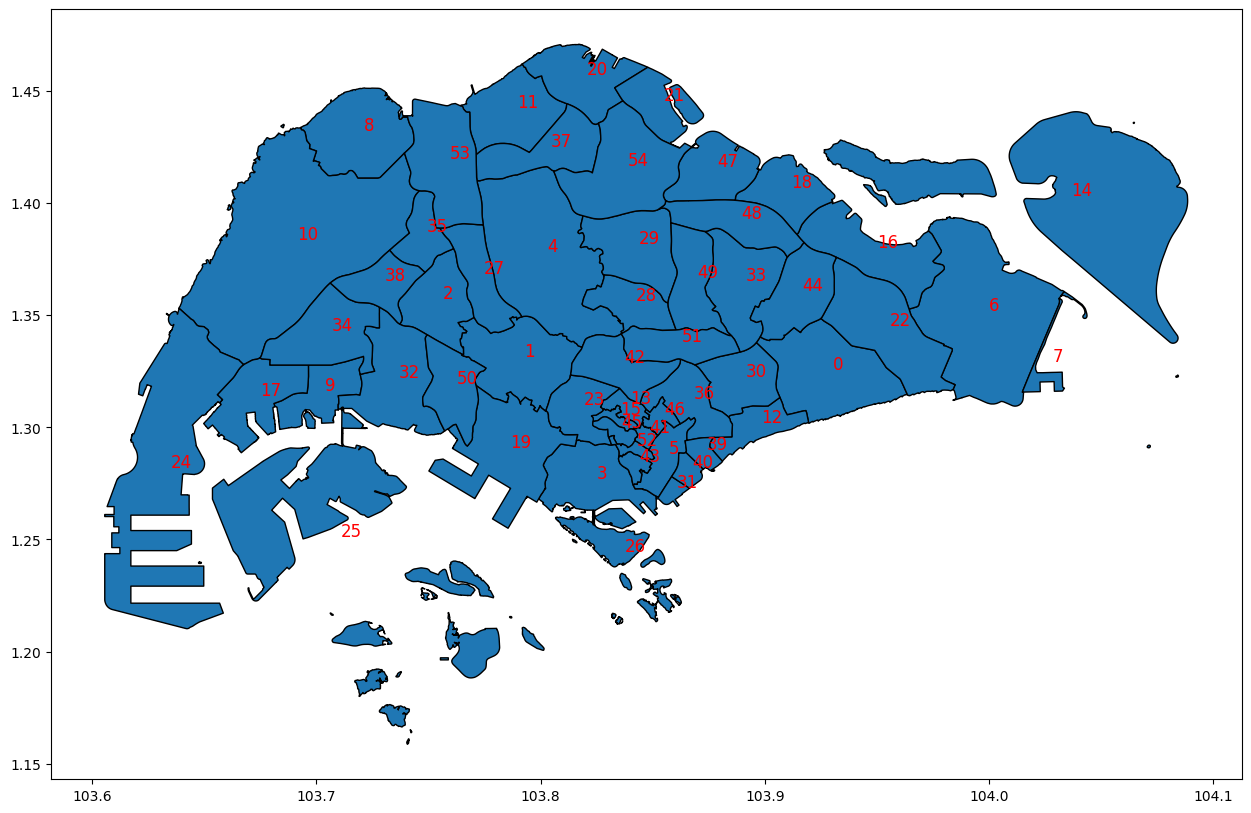

In [4]:
# https://www.kaggle.com/datasets/shymammoth/singapore-district-planning-area-geojson
fig, ax = plt.subplots(figsize=(25, 10))

gdf_districts['centroid'] = gdf_districts.geometry.centroid

gdf_districts.plot(ax=ax,edgecolor='black')

for idx, row in gdf_districts.iterrows():
    ax.annotate(text=idx, xy=(row['centroid'].x, row['centroid'].y), 
                xytext=(3, 3), textcoords="offset points", fontsize=12, color='red')

ax.set_aspect('equal')

plt.show()

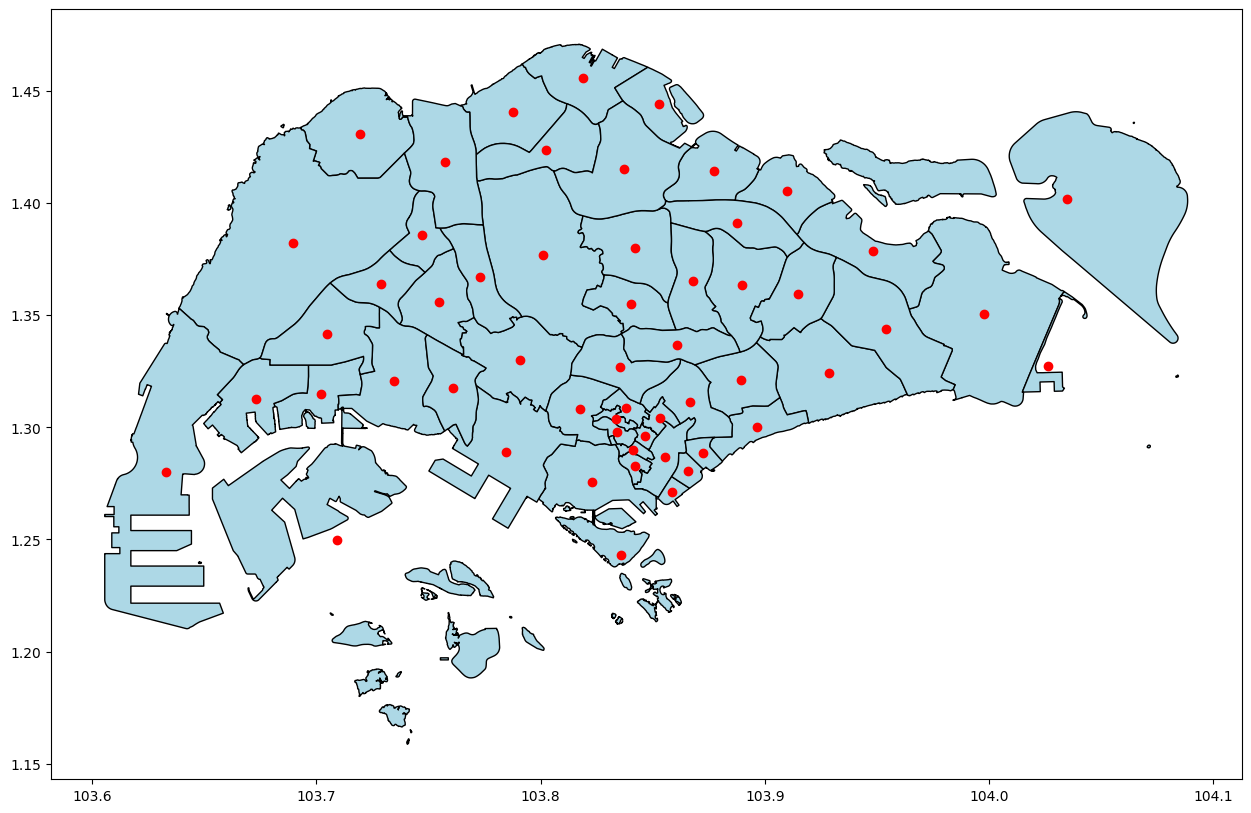

In [5]:
# Plot centers of districts, drop some issue points (Changi Bay, North-Eastern Islands, Western Islands)
#gdf_districts['centroid'] = gdf_districts['geometry'].drop(index=[7, 14, 25]).centroid
gdf_districts['centroid'] = gdf_districts['geometry'].centroid

# Plotting the centroids
fig, ax = plt.subplots(figsize=(25, 10))
gdf_districts.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_districts['centroid'].plot(ax=ax, color='red')
plt.show()

In [6]:
gdf_districts['centroid'].head()

0    POINT (103.92841 1.32405)
1    POINT (103.79070 1.33000)
2    POINT (103.75473 1.35566)
3    POINT (103.82314 1.27549)
4    POINT (103.80120 1.37665)
Name: centroid, dtype: geometry

2. Find out destination points(incine)

In [7]:
#Because 4 points at Tuas is very close, see them as 1 point to simplify

#Incineration point 1 (TuasOne Waste-to-Energy Plant)
#dest1 = (1.298935, 103.622875)
#Incineration point 2 (Keppel Segphers Tuas Waste-to-Energy Plant)
#dest2 = (1.297584, 103.621489)

dest3 = (1.295947, 103.621136)

dest4 = (1.463336, 103.794657)
#Landfill point
#dest5 = (1.295947, 103.621136)

#incinerations = [dest1, dest2, dest3, dest4, dest5]
incinerations = [dest3, dest4]

3. Add waste volume

In [8]:
df = pd.read_excel('Singapore population 2020 V2.xlsx')

df.head()

,Planning Area of Residence,Subzone,Total,HDB _Total,HDB_1_2RM,HDB_3_RM,HDB_4RM,HDB_5RM_EXE,CONDO_APARTMENTS,LANDED_PROP,OTHERS,Waste Generated Per Day (kg)
0,Total,Total,4044210,3152410,177360,575200,1338370,1061480,607940,248860,35000,2742596.7
1,Ang Mo Kio,Total,162280,131020,10720,55910,43030,21370,13980,15880,1390,113987.4
2,Ang Mo Kio,Ang Mo Kio Town Centre,4810,2830,-,400,630,1800,1950,-,30,2462.1
3,Ang Mo Kio,Cheng San,28070,27970,970,13290,8810,4900,-,-,100,24333.9
4,Ang Mo Kio,Chong Boon,26500,26000,1470,12180,8560,3790,-,-,500,22620.0


In [9]:
df = df[df['Subzone'] == 'Total']
df = df.drop(index=0)
df = df.iloc[:, [0, -1]]
df.head()

,Planning Area of Residence,Waste Generated Per Day (kg)
1,Ang Mo Kio,113987.4
14,Bedok,152789.4
23,Bishan,51634.5
27,Boon Lay,0.0
32,Bukit Batok,108532.5


In [10]:
gdf_districts = gdf_districts.merge(df, how='left', left_on='planning_area', right_on='Planning Area of Residence')
gdf_districts = gdf_districts.drop(['Planning Area of Residence'], axis=1)
gdf_districts

,district,planning_area,geometry,centroid,Waste Generated Per Day (kg)
0,East,Bedok,"MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",POINT (103.92841 1.32405),152789.4
1,Central,Bukit Timah,"MULTIPOLYGON (((103.79766 1.34813, 103.79806 1...",POINT (103.79070 1.33000),6116.1
2,West,Bukit Batok,"MULTIPOLYGON (((103.76408 1.37001, 103.76444 1...",POINT (103.75473 1.35566),108532.5
3,Central,Bukit Merah,"MULTIPOLYGON (((103.82362 1.26018, 103.82362 1...",POINT (103.82314 1.27549),117493.5
4,North,Central Water Catchment,"MULTIPOLYGON (((103.80702 1.41126, 103.80754 1...",POINT (103.80120 1.37665),0.0
5,Central,Downtown Core,"MULTIPOLYGON (((103.86655 1.30386, 103.86696 1...",POINT (103.85550 1.28679),530.7
6,East,Changi,"MULTIPOLYGON (((103.98236 1.39356, 103.98242 1...",POINT (103.99782 1.35032),313.2
7,East,Changi Bay,"MULTIPOLYGON (((104.03143 1.35741, 104.03154 1...",POINT (104.02636 1.32742),0.0
8,North,Lim Chu Kang,"MULTIPOLYGON (((103.72246 1.45116, 103.72426 1...",POINT (103.71929 1.43064),0.0
9,West,Boon Lay,"MULTIPOLYGON (((103.72042 1.32824, 103.72003 1...",POINT (103.70222 1.31479),0.0


In [11]:
gdf_districts = gdf_districts[gdf_districts['Waste Generated Per Day (kg)'] != 0.0]
gdf_districts = gdf_districts.reset_index(drop=True)
gdf_districts

,district,planning_area,geometry,centroid,Waste Generated Per Day (kg)
0,East,Bedok,"MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",POINT (103.92841 1.32405),152789.4
1,Central,Bukit Timah,"MULTIPOLYGON (((103.79766 1.34813, 103.79806 1...",POINT (103.79070 1.33000),6116.1
2,West,Bukit Batok,"MULTIPOLYGON (((103.76408 1.37001, 103.76444 1...",POINT (103.75473 1.35566),108532.5
3,Central,Bukit Merah,"MULTIPOLYGON (((103.82362 1.26018, 103.82362 1...",POINT (103.82314 1.27549),117493.5
4,Central,Downtown Core,"MULTIPOLYGON (((103.86655 1.30386, 103.86696 1...",POINT (103.85550 1.28679),530.7
5,East,Changi,"MULTIPOLYGON (((103.98236 1.39356, 103.98242 1...",POINT (103.99782 1.35032),313.2
6,North,Woodlands,"MULTIPOLYGON (((103.79281 1.46048, 103.79282 1...",POINT (103.78770 1.44068),205293.9
7,Central,Marine Parade,"MULTIPOLYGON (((103.90806 1.30982, 103.90821 1...",POINT (103.89627 1.30023),16938.9
8,East,Pasir Ris,"MULTIPOLYGON (((103.93478 1.40099, 103.93625 1...",POINT (103.94829 1.37862),89279.4
9,North-East,Punggol,"MULTIPOLYGON (((103.91082 1.42147, 103.91084 1...",POINT (103.91005 1.40536),131865.9


4. Mark them in osmnx

In [12]:
place_name = "Singapore"

G = ox.graph_from_place(place_name, network_type="drive")

In [13]:
centroid_lats = gdf_districts['centroid'].y.dropna().tolist()
centroid_lons = gdf_districts['centroid'].x.dropna().tolist()

nearest_centroid_nodes = ox.distance.nearest_nodes(G, X=centroid_lons, Y=centroid_lats)

nearest_centroid_node_points = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nearest_centroid_nodes]

nearest_centroid_node_lats, nearest_centroid_node_lons = zip(*nearest_centroid_node_points)


In [14]:
incinerations_lats = [lat for lat, _ in incinerations] 
incinerations_lons = [lon for _, lon in incinerations] 

nearest_incineration_nodes = ox.distance.nearest_nodes(G, X=incinerations_lons,Y=incinerations_lats)

#Drop repeated points
unique_incineration_nodes = list(set(nearest_incineration_nodes))
nearest_incineration_nodes = unique_incineration_nodes

nearest_incineration_node_points = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nearest_incineration_nodes]

nearest_incineration_lats, nearest_incineration_lons = zip(*nearest_incineration_node_points)

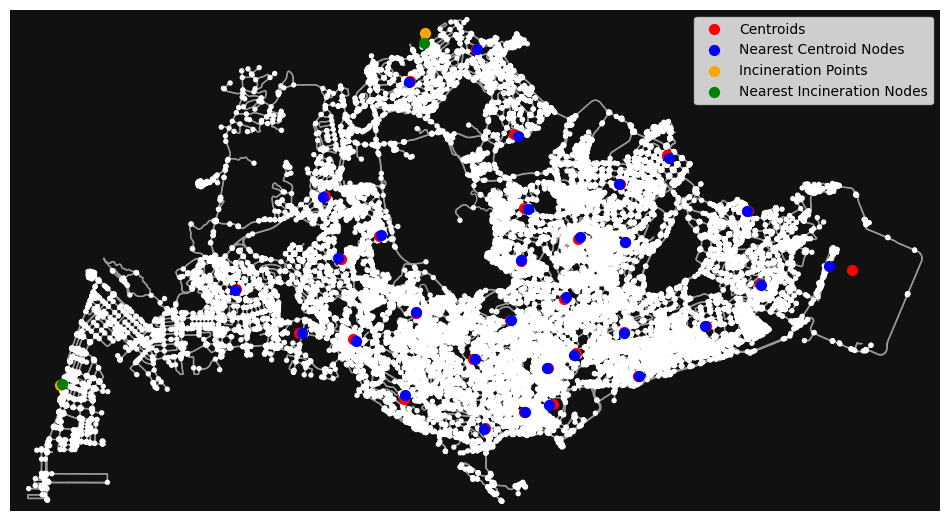

In [15]:
fig, ax = ox.plot_graph(G, figsize=(12, 12), show=False, close=False)

ax.scatter(centroid_lons, centroid_lats, color='red', s=50, zorder=5, label='Centroids')

ax.scatter(nearest_centroid_node_lons, nearest_centroid_node_lats, color='blue', s=50, zorder=5, label='Nearest Centroid Nodes')

ax.scatter(incinerations_lons, incinerations_lats, color='orange', s=50, zorder=5, label='Incineration Points')

ax.scatter(nearest_incineration_lons, nearest_incineration_lats, color='green', s=50, zorder=5, label='Nearest Incineration Nodes')

ax.legend()

plt.show()

5. GA

In [16]:

import networkx as nx
def get_shortest_distance(startnode, endnode):
    distance = nx.shortest_path_length(G, startnode, endnode, weight="length")
    return distance

def get_shortest_route(startnode, endnode):
    route = nx.shortest_path(G, startnode, endnode, weight="length")
    return route

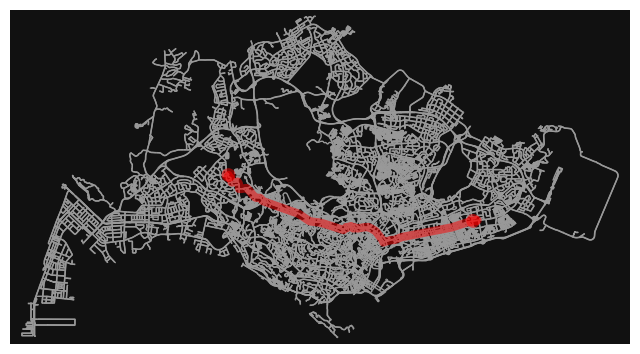

23152.543999999983

In [17]:
distance = get_shortest_distance(nearest_centroid_nodes[0],nearest_centroid_nodes[2])
route = get_shortest_route(nearest_centroid_nodes[0],nearest_centroid_nodes[2])
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0)
distance

In [18]:
import pygad

centroid_nodes = nearest_centroid_nodes
incinerations_nodes = nearest_incineration_nodes
len(centroid_nodes)

31

Generate Distance Matrix to Speed Up

In [19]:
all_nodes = centroid_nodes + incinerations_nodes
count = len(all_nodes)
distance_matrix = np.empty((count, count))
for i in range(count):
    for j in range(count):
        distance_matrix[i, j] = get_shortest_distance(all_nodes[i], all_nodes[j])

Fitness Function without Consideration of Waste Volume

In [858]:
'''
#Define fitness function
def fitness_func(ga_instance, solution, solution_idx):
    solution = [int(x) for x in solution]
    
    num_points = solution[0] - 40
    total_distance = 0
    
    #From startpoint 1 to first destination
    #total_distance += get_shortest_distance(incinerations_nodes[0], centroid_nodes[solution[1]])
    total_distance += distance_matrix[-2, solution[1]]

    for i in range(2, len(solution)):
        if i == num_points + 1:
            #total_distance += get_shortest_distance(centroid_nodes[solution[i-1]], incinerations_nodes[0])
            #total_distance += get_shortest_distance(incinerations_nodes[1], centroid_nodes[solution[i]])
            total_distance += distance_matrix[solution[i-1], -2]
            total_distance += distance_matrix[-1, solution[i]]
        else:
            #total_distance += get_shortest_distance(centroid_nodes[solution[i-1]], centroid_nodes[solution[i]])
            total_distance += distance_matrix[solution[i-1], solution[i]]

    #From last destination to startpoint 2 
    #total_distance += get_shortest_distance(centroid_nodes[solution[-1]], incinerations_nodes[1])
    total_distance += distance_matrix[solution[-1], -1]
    return -total_distance
'''

In [927]:
'''num_generations = 200
num_parent_mating = 100

sol_per_pop = 500
num_genes = len(centroid_nodes) + 1  #One value for splitting the solution to 2 parts'''

In [860]:
'''#Set initial population
def init_gene():
    first_gene = np.random.randint(46, num_genes + 34)
    remaining_genes = np.random.permutation(num_genes-1)
    solution = np.concatenate([[first_gene],remaining_genes])
    return solution

initial_population = []
for _ in range(sol_per_pop):
    initial_population.append(init_gene())
initial_population = np.array(initial_population)'''

In [ ]:
'''gene_space = [range(num_genes - 1)] * num_genes
gene_space[0] = range(46, num_genes + 34)
gene_space[0:2]'''

In [862]:
'''last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]'''

In [935]:
'''def custom_mutation(offspring, ga_instance):
    for i in range(offspring.shape[0]):
        gene_index = 0
        mutation_prob = 0.7
        if np.random.rand() < mutation_prob:
            offspring[i, gene_index] = np.random.randint(46, 66)

        random_gene_idx = np.random.choice(range(1, offspring.shape[1]))
        mutation_prob = 0.8
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
        
        random_gene_idx = np.random.choice(range(1, offspring.shape[1]))
        mutation_prob = 0.5
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
        
        random_gene_idx = np.random.choice(range(1, offspring.shape[1]))
        mutation_prob = 0.2
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
            
    
    return offspring'''

In [ ]:
'''ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parent_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       initial_population=initial_population,
                       gene_space=gene_space,
                       allow_duplicate_genes=False,
                       gene_type=int,
                       keep_parents=1,
                       keep_elitism=0,
                       parent_selection_type='sss',
                       mutation_type=custom_mutation,
                       mutation_percent_genes=15)'''

In [ ]:
'''for _ in range(10):
    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print(f"Best Solution: {solution}, Fitness: {solution_fitness}")'''

In [ ]:
'''ga_instance.plot_fitness()'''

In [953]:
'''point_index = ga_instance.best_solution()[0]
point_index = [int(x) for x in point_index]
points = [centroid_nodes[i] for i in point_index[1:]]'''


In [ ]:
'''full_route = []
print(point_index[0] - 45)
route = nx.shortest_path(G, incinerations_nodes[0], points[0], weight='length')
full_route.extend(route)
for i in range(point_index[0] - 45):    
    route = nx.shortest_path(G, points[i], points[i+1], weight='length')
    full_route.extend(route[1:])
route = nx.shortest_path(G, points[point_index[0] - 45], incinerations_nodes[0], weight='length')
full_route.extend(route[1:])

fig, ax = ox.plot_graph_route(G, full_route, route_linewidth=1, node_size=0, )'''

In [ ]:
'''full_route = []
print(len(points))
route = nx.shortest_path(G, incinerations_nodes[1], points[point_index[0] - 45], weight='length')
full_route.extend(route)
for i in range(point_index[0] - 45, 30):
    route = nx.shortest_path(G, points[i], points[i+1], weight='length')
    full_route.extend(route[1:])
route = nx.shortest_path(G, points[30], incinerations_nodes[1], weight='length')
full_route.extend(route[1:])


fig, ax = ox.plot_graph_route(G, full_route, route_linewidth=1, node_size=0)'''

In [911]:
'''filename = 'genetic_1000train_204445'
ga_instance.save(filename=filename)'''

In [956]:
'''loaded_ga_instance = pygad.load(filename=filename)'''

In [957]:
'''point_index = loaded_ga_instance.best_solution()[0]
point_index = [int(x) for x in point_index]
points = [centroid_nodes[i] for i in point_index[1:]]'''

In [ ]:
'''full_route = []
print(point_index[0] - 45)
route = nx.shortest_path(G, incinerations_nodes[0], points[0], weight='length')
full_route.extend(route)
for i in range(point_index[0] - 45):    
    route = nx.shortest_path(G, points[i], points[i+1], weight='length')
    full_route.extend(route[1:])
route = nx.shortest_path(G, points[point_index[0] - 45], incinerations_nodes[0], weight='length')
full_route.extend(route[1:])

fig, ax = ox.plot_graph_route(G, full_route, route_linewidth=1, node_size=0, )'''

In [ ]:
'''full_route = []
print(len(points))
route = nx.shortest_path(G, incinerations_nodes[1], points[point_index[0] - 45], weight='length')
full_route.extend(route)
for i in range(point_index[0] - 45, 30):
    route = nx.shortest_path(G, points[i], points[i+1], weight='length')
    full_route.extend(route[1:])
route = nx.shortest_path(G, points[30], incinerations_nodes[1], weight='length')
full_route.extend(route[1:])


fig, ax = ox.plot_graph_route(G, full_route, route_linewidth=1, node_size=0)'''

Fitness Function Considering Waste Volume and Balanced Route

In [89]:
#Dictionary Containing Route Starting from 2 Points
solved_route = {0:{1:[],2:[]}}
truck_capacity = 50000  #kg

In [21]:
def get_waste_volume(n):
    return df.iloc[n]['Waste Generated Per Day (kg)']

In [22]:
def calculate_distance(route):
    distance_mid = 0
    for j in range(0, len(route)-1):
        distance_mid += distance_matrix[route[j], route[j+1]]
    distance_1 = distance_mid + distance_matrix[-2, route[0]] + distance_matrix[route[-1], -2]
    distance_2 = distance_mid + distance_matrix[-1, route[0]] + distance_matrix[route[-1], -1]
    flag = distance_1 < distance_2
    distance = min(distance_1, distance_2)
    return flag, distance 

In [23]:
def calculate_distance_new(route):
    distance_mid = 0
    for j in range(0, len(route)-1):
        distance_mid += distance_matrix[route[j], route[j+1]]
    distance_1 = distance_mid + distance_matrix[-2, route[0]] + distance_matrix[route[-1], -2]
    distance_2 = distance_mid + distance_matrix[-1, route[0]] + distance_matrix[route[-1], -1]
    return distance_1, distance_2

In [110]:
tolerance = 0.2 #route difference can be max 20% of total routes

In [163]:
#Define fitness function
def fitness_func_greedy(ga_instance, solution, solution_idx):
    solution = [int(x) for x in solution]
    global solved_route
    if solution_idx == 0:
        solved_route = {0:{1:[],2:[]}}
    solved_route.setdefault(solution_idx, {1:[],2:[]})
    solved_route_distance = {1:[],2:[]}
    
    total_distance = 0
    current_capacity = truck_capacity
    current_route = []
    route_idx = 0
    routes = {}

    for i in range(0, len(solution)):
        current_volume = get_waste_volume(solution[i])
        while(current_volume >= truck_capacity):
            solved_route_distance[1].append((distance_matrix[-2, solution[i]] + distance_matrix[solution[i], -2], route_idx))
            solved_route_distance[2].append((distance_matrix[-1, solution[i]] + distance_matrix[solution[i], -1], route_idx))
            routes.setdefault(route_idx, [solution[i]])
            route_idx += 1
            current_volume -= truck_capacity
        
        if(current_capacity >= current_volume):
            current_capacity -= current_volume
            current_route.append(solution[i])
        else:
            current_volume -= current_capacity
            current_capacity = truck_capacity
            current_route.append(solution[i])

            distance_1, distance_2  = calculate_distance_new(current_route)
            solved_route_distance[1].append((distance_1, route_idx))
            solved_route_distance[2].append((distance_2, route_idx))

            routes.setdefault(route_idx, current_route)
            route_idx += 1
            
            current_route = []
            current_capacity -= current_volume
            current_route.append(solution[i])
        if i == len(solution)-1:
            distance_1, distance_2 = calculate_distance_new(current_route)
            solved_route_distance[1].append((distance_1, route_idx))
            solved_route_distance[2].append((distance_2, route_idx))
            routes.setdefault(route_idx, current_route)
            assigned_route = set()

    max_assigned = int((route_idx * (1 + tolerance)) // 2)
    dist_list = []
    for distance, idx in solved_route_distance[1]:
        dist_list.append((distance, 1, idx))
    for distance, idx in solved_route_distance[2]:
        dist_list.append((distance, 2, idx))
    dist_list.sort()

    assignment_count = {1:0, 2:0}

    for dist, start, idx in dist_list:
        if idx in assigned_route:
            continue

        if assignment_count[start] < max_assigned:
            solved_route[solution_idx][start].append((routes[idx],dist))
            assignment_count[start] += 1
            total_distance += dist
            assigned_route.add(idx)  

    return -total_distance

In [23]:
'''#Define fitness function
def fitness_func(ga_instance, solution, solution_idx):
    solution = [int(x) for x in solution]
    solved_route.setdefault(solution_idx, {1:[],2:[]})
    
    #num_points = solution[0] - 40
    total_distance = 0
    current_capacity = truck_capacity
    current_route = []

    for i in range(0, len(solution)):
        current_volume = get_waste_volume(solution[i])
        while(current_volume >= truck_capacity):
            if(distance_matrix[-1, solution[i]] > distance_matrix[-2, solution[i]]):
                #total_distance += distance_matrix[-2, solution[i]]
                #total_distance += distance_matrix[solution[i], -2]
                solved_route[solution_idx][1].append([solution[i]])
            else:
                #total_distance += distance_matrix[-1, solution[i]]
                #total_distance += distance_matrix[solution[i], -1]
                solved_route[solution_idx][2].append([solution[i]])
            current_volume -= truck_capacity
        
        if(current_capacity >= current_volume):
            current_capacity -= current_volume
            current_route.append(solution[i])
        else:
            current_volume -= current_capacity
            current_capacity = truck_capacity
            current_route.append(solution[i])
            flag, distance = calculate_distance(current_route)
            total_distance += distance
            if(flag):
                solved_route[solution_idx][1].append(current_route)
            else:
                solved_route[solution_idx][2].append(current_route)
            current_route = []
            current_capacity -= current_volume
            current_route.append(solution[i])
        if i == len(solution)-1:
            flag, distance = calculate_distance(current_route)
            total_distance += distance
            if(flag):
                solved_route[solution_idx][1].append(current_route)
            else:
                solved_route[solution_idx][2].append(current_route)
    return -total_distance'''

In [178]:
num_generations = 200
num_parent_mating = 100

sol_per_pop = 500
num_genes = len(centroid_nodes)
print(num_genes)

31


In [27]:
#Set initial population
def init_gene():
    solution = np.random.permutation(num_genes)
    return solution

initial_population = []
for _ in range(sol_per_pop):
    initial_population.append(init_gene())
initial_population = np.array(initial_population)

In [28]:
gene_space = [range(num_genes)] * num_genes

In [29]:
last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [30]:
def custom_mutation(offspring, ga_instance):
    for i in range(offspring.shape[0]):
        random_gene_idx = np.random.choice(range(0, offspring.shape[1]))
        mutation_prob = 0.8
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
        
        random_gene_idx = np.random.choice(range(0, offspring.shape[1]))
        mutation_prob = 0.5
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
        
        random_gene_idx = np.random.choice(range(0, offspring.shape[1]))
        mutation_prob = 0.2
        if np.random.rand() < mutation_prob:
            random_value = np.random.randint(0, 31)
            index = np.where(offspring[i] == random_value)[0]
            if(random_gene_idx != index):
                offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
            
    
    return offspring

In [179]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parent_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func_greedy,
                       on_generation=on_generation,
                       initial_population=initial_population,
                       gene_space=gene_space,
                       allow_duplicate_genes=False,
                       gene_type=int,
                       keep_parents=1,
                       keep_elitism=0,
                       parent_selection_type='tournament',
                       mutation_type=custom_mutation,
                       mutation_percent_genes=15)

d:\Python\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [202]:
solved_route = {0:{1:[],2:[]}}

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print(f"Best Solution: {solution}, Fitness: {solution_fitness}")

C:\Users\Inella von Einzbern\AppData\Local\Temp\ipykernel_2060\3005670492.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
C:\Users\Inella von Einzbern\AppData\Local\Temp\ipykernel_2060\3005670492.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring[i, index], offspring[i, random_gene_idx] = offspring[i, random_gene_idx], offspring[i, index]
C:\Users\Inella von Einzbern\AppData\Local\Temp\ipykernel_2060\3005670492.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fu

Generation = 401
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 402
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 403
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 404
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 405
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 406
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 407
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 408
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 409
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 410
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 411
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 412
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 413
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 414
Fitness    = -1658333.8880000003
Change     = 0.0
Generation = 415
Fitness    = -1658333.8880000003
Change     =

d:\Python\Lib\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


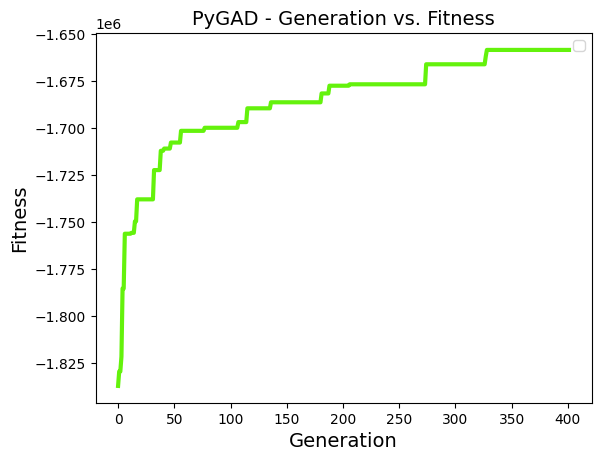

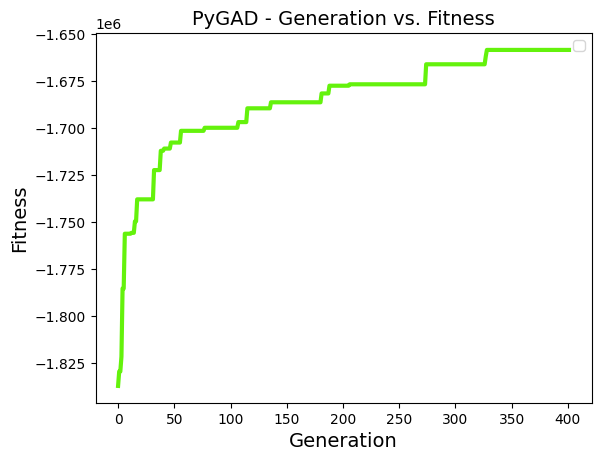

In [192]:
ga_instance.plot_fitness()

In [182]:
solved_route

{0: {1: [([18], 33592.791),
   ([4], 64093.278000000006),
   ([4], 64093.278000000006),
   ([17], 73242.788),
   ([17], 73242.788),
   ([14, 13, 29, 15], 80113.94200000002),
   ([0], 81539.05500000005),
   ([0], 81539.05500000005),
   ([12], 89249.91300000006),
   ([10, 17, 0, 4, 3, 28, 18], 90349.443),
   ([5], 99689.64500000005),
   ([5], 99689.64500000005),
   ([23, 16, 19, 25, 7, 24, 1, 14], 105316.78099999999),
   ([18, 20, 2, 21, 12, 5, 8, 27, 22, 26, 9, 23], 165225.815)],
  2: [([6], 7631.729000000001),
   ([6], 7631.729000000001),
   ([11], 8327.988),
   ([11], 8327.988),
   ([11, 6], 12185.095000000001),
   ([30], 17169.697999999997),
   ([30, 11], 18574.684),
   ([16], 25674.644999999997),
   ([14], 28339.939),
   ([15], 31942.723000000005),
   ([15], 31942.723000000005),
   ([2], 32585.238999999994),
   ([15, 30], 34308.193999999996),
   ([1], 40161.09400000001),
   ([1], 40161.09400000001),
   ([1], 40161.09400000001),
   ([17], 45636.35699999999),
   ([17], 45636.356999999

In [200]:
len(solved_route[solution_idx][1])

14

In [201]:
len(solved_route[solution_idx][2])

18

In [195]:
unique_route_1 = list(set(tuple(sublist) for sublist, dist in solved_route[solution_idx][1]))
print(len(unique_route_1))
unique_route_1

10


[(12,),
 (18,),
 (4, 17, 0, 3, 10, 28, 18),
 (14, 1, 15),
 (5,),
 (23, 16, 9, 26, 8, 19, 27, 7, 24, 14),
 (4,),
 (17,),
 (18, 20, 2, 21, 29, 5, 12, 22, 25, 13, 23),
 (0,)]

In [196]:
unique_route_2 = list(set(tuple(sublist) for sublist, dist in solved_route[solution_idx][2]))
print(len(unique_route_2))
unique_route_2

12


[(6,),
 (2,),
 (15,),
 (15, 30),
 (11,),
 (30,),
 (14,),
 (11, 6),
 (17,),
 (1,),
 (16,),
 (30, 11)]

In [197]:
point_index = ga_instance.best_solution()[0]
point_index = [int(x) for x in point_index]
points = [centroid_nodes[i] for i in point_index[0:]]
len(points)

31

In [188]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#F60009', '#09F600', '#0009F6', 
          '#FFFF00', '#00FFFF', '#FF00FF', '#F6F609', '#09F6F6', '#F609F6',
          '#FFA500', '#800080', '#FFC0CB', '#F6A509', '#890089', '#F6C0D2',
          '#ADD8E6', '#8B0000', '#006400', '#A0D9E6', '#910009', '#096409',
          '#00008B', '#90EE90', '#FFD700', '#91F691', '#000091', '#F6D709',
          '#000080', '#808000', '#F5F5DC', '#C0C9C0', '#000089', '#898009',
          '#F6F5E2', '#87CEEB', '#C71585', '#228B22', '#B8860B', '#FF6347']

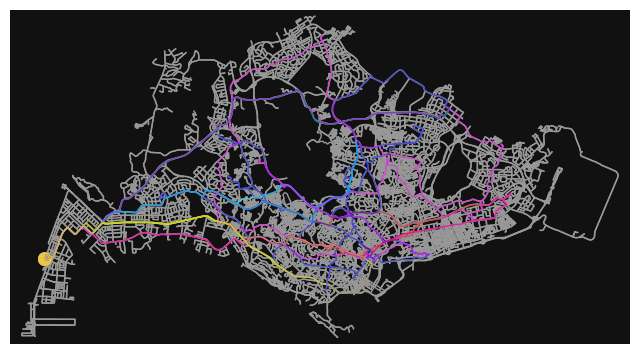

In [198]:
all_routes = []
for i in range(0, len(unique_route_1)):
    r = unique_route_1[i]
    full_route = []
    route = nx.shortest_path(G, incinerations_nodes[0], points[r[0]], weight='length')
    full_route.extend(route)
    for i in range(0, len(r)-1):
        route = nx.shortest_path(G, points[r[i]], points[r[i+1]], weight='length')
        full_route.extend(route[1:])
    route = nx.shortest_path(G, points[r[-1]], incinerations_nodes[0], weight='length')
    full_route.extend(route[1:])
    all_routes.append(full_route)
if len(all_routes) > 1:
    fig, ax = ox.plot_graph_routes(G, all_routes, route_linewidths=1, node_size=0, route_colors=colors[0:len(all_routes)])
elif len(all_routes) == 1:
    fig, ax = ox.plot_graph_route(G, all_routes[0], route_linewidth=1, node_size=0)
else:
    print("No Route starting from this point")


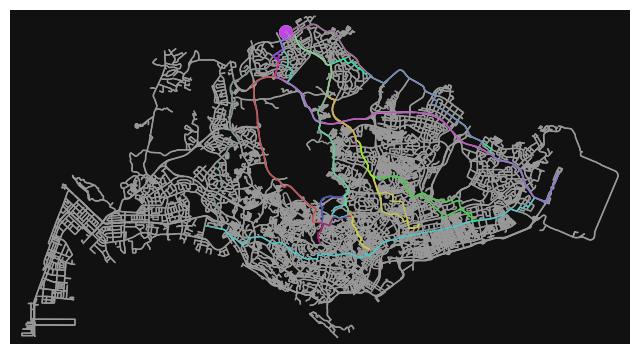

In [199]:
all_routes = []
for i in range(0, len(unique_route_2)):
    r = unique_route_2[i]
    full_route = []
    route = nx.shortest_path(G, incinerations_nodes[1], points[r[0]], weight='length')
    full_route.extend(route)
    for i in range(0, len(r)-1):
        route = nx.shortest_path(G, points[r[i]], points[r[i+1]], weight='length')
        full_route.extend(route[1:])
    route = nx.shortest_path(G, points[r[-1]], incinerations_nodes[1], weight='length')
    full_route.extend(route[1:])
    all_routes.append(full_route)
if len(all_routes) > 1:
    fig, ax = ox.plot_graph_routes(G, all_routes, route_linewidths=1, node_size=0, route_colors=colors[0:len(all_routes)])
elif len(all_routes) == 1:
    fig, ax = ox.plot_graph_route(G, all_routes[0], route_linewidth=1, node_size=0)
else:
    print("No Route starting from this point")

In [87]:
filename = 'ga_with_volume_580648_200_100_500_1_0_tournament'
ga_instance.save(filename=filename)